In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data = pd.read_csv('/content/Dataset.csv')
data = data.drop(['Timestamp'] , axis = 1)
data.head(3)

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
1,4th year,Normal,40,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
2,4th year,Bad,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7


In [4]:
data.shape

(704, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Which year are you in?                                                                        704 non-null    object
 1   How are you feeling right now?                                                                704 non-null    object
 2   On a scale of 1-100, how would you express this feeling?                                      704 non-null    int64 
 3   Gender                                                                                        704 non-null    object
 4   Age                                                                                           704 non-null    int64 
 5   Your location ?                     

In [6]:
new_data = data.dropna(axis = 0)

In [7]:
new_data.shape

(703, 20)

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 703
Data columns (total 20 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Which year are you in?                                                                        703 non-null    object
 1   How are you feeling right now?                                                                703 non-null    object
 2   On a scale of 1-100, how would you express this feeling?                                      703 non-null    int64 
 3   Gender                                                                                        703 non-null    object
 4   Age                                                                                           703 non-null    int64 
 5   Your location ?                     

In [9]:
new_data.describe()

,"On a scale of 1-100, how would you express this feeling?",Age,How much have you succeeded to cope up with the environment of your educational institution?,How long did you sleep last night?(in hours)
count,703.000000,703.0,703.000000,703.000000
mean,56.204836,23.0,3.257468,6.807966
std,30.223491,0.0,1.254279,1.957917
min,1.000000,23.0,1.000000,3.000000
25%,30.000000,23.0,2.000000,6.000000
50%,59.000000,23.0,3.000000,7.000000
75%,85.000000,23.0,4.000000,8.000000
max,100.000000,23.0,5.000000,10.000000


In [10]:
ques = new_data.columns
ques

Index(['Which year are you in?', 'How are you feeling right now?',
       'On a scale of 1-100, how would you express this feeling?', 'Gender',
       'Age', 'Your location ?', 'Relationship status',
       'Are you happy with your financial state?',
       'How much have you succeeded to cope up with the environment of your educational institution?',
       'Understanding with your family members?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your academic result?',
       'Are you happy with your living place?',
       'Who supports you when you are not succeeding in your academic life?',
       'Have you used any social media within the last 6 hours?',
       'Do you have inferiority complex? ',
       'Are you satisfied with your meal today?',
       'Are you feeling sick/health issues today?',
       'Have you done any recreational activity (sports, gaming, hobby etc.) today?',
       'How long did you sleep last night?(in hou

In [11]:
df = new_data.copy()

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df = new_data.apply(LabelEncoder().fit_transform)
df


,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,0,2,49,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4
1,0,2,39,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4
2,0,0,49,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4
3,0,2,44,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4
4,0,2,49,0,0,2,0,1,3,2,1,1,1,0,0,1,2,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,2,61,0,0,3,0,1,4,2,0,0,0,1,0,0,2,0,0,5
700,0,4,89,0,0,3,0,1,4,2,0,0,1,0,0,1,0,0,1,6
701,0,4,91,0,0,1,0,1,4,2,0,1,1,0,0,1,2,0,0,5
702,0,4,98,0,0,3,0,1,3,1,0,1,1,1,0,1,2,0,1,7


In [13]:
df.describe()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
count,703.0,703.000000,703.000000,703.0,703.0,703.000000,703.0,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.0,703.000000,703.000000,703.000000,703.000000,703.000000
mean,0.0,1.934566,55.204836,0.0,0.0,1.540541,0.0,0.704125,2.257468,1.315789,0.465149,0.520626,0.715505,0.496444,0.0,0.911807,1.093883,0.284495,0.496444,3.807966
std,0.0,1.396470,30.223491,0.0,0.0,1.109782,0.0,0.456760,1.254279,0.675049,0.499139,0.499930,0.451495,0.500343,0.0,0.575536,0.939634,0.451495,0.500343,1.957917
min,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.000000,29.000000,0.0,0.0,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,3.000000
50%,0.0,2.000000,58.000000,0.0,0.0,2.000000,0.0,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,4.000000
75%,0.0,3.000000,84.000000,0.0,0.0,2.000000,0.0,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,2.000000,1.000000,1.000000,5.000000
max,0.0,4.000000,99.000000,0.0,0.0,3.000000,0.0,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,2.000000,2.000000,1.000000,1.000000,7.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 703
Data columns (total 20 columns):
 #   Column                                                                                        Non-Null Count  Dtype
---  ------                                                                                        --------------  -----
 0   Which year are you in?                                                                        703 non-null    int64
 1   How are you feeling right now?                                                                703 non-null    int64
 2   On a scale of 1-100, how would you express this feeling?                                      703 non-null    int64
 3   Gender                                                                                        703 non-null    int64
 4   Age                                                                                           703 non-null    int64
 5   Your location ?                            

In [15]:
correlation_matrix = df.corr()
correlation_matrix['How are you feeling right now?'].sort_values(ascending = False)

How are you feeling right now?                                                                  1.000000
How long did you sleep last night?(in hours)                                                    0.248603
On a scale of 1-100, how would you express this feeling?                                        0.234482
How much have you succeeded to cope up with the environment of your educational institution?    0.186926
Are you happy with your financial state?                                                        0.154967
Are you happy with your living place?                                                           0.126326
Understanding with your family members?                                                         0.108084
Are you satisfied with your academic result?                                                    0.089674
Have you done any recreational activity (sports, gaming, hobby etc.) today?                     0.015976
Who supports you when you are not succeeding in your ac

In [16]:
#target varibale and feature

y = df['How are you feeling right now?']
X = df.drop(['How are you feeling right now?',
                       'Gender', 'Age', 'Relationship status',
                       'Which year are you in?','Have you used any social media within the last 6 hours?'], axis=1)

In [17]:
#split data into train and test

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

In [18]:
X_train.shape

(492, 14)

In [19]:
X_valid.shape

(211, 14)

In [23]:
#fit model
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)



In [24]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
# accuracy on training set

model.score(X_train,y_train)

1.0

In [26]:
#checking validation accuracy

model.score(X_valid,y_valid)

0.95260663507109

In [27]:
model.predict(X_valid)

array([0, 3, 2, 3, 3, 4, 3, 4, 2, 1, 2, 1, 2, 2, 3, 2, 3, 0, 2, 0, 1, 1,
       0, 4, 4, 1, 3, 3, 2, 4, 2, 4, 1, 1, 0, 4, 1, 4, 2, 1, 4, 0, 2, 4,
       2, 3, 0, 4, 1, 0, 0, 0, 0, 4, 1, 0, 2, 1, 1, 1, 2, 3, 4, 2, 4, 3,
       0, 3, 4, 4, 1, 4, 4, 4, 4, 0, 1, 3, 3, 4, 3, 0, 3, 1, 2, 3, 0, 4,
       0, 1, 1, 2, 2, 1, 4, 2, 4, 4, 4, 4, 4, 3, 3, 3, 2, 3, 2, 4, 3, 4,
       3, 3, 0, 0, 1, 3, 2, 0, 2, 2, 2, 1, 2, 3, 1, 3, 1, 0, 4, 1, 1, 1,
       4, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 3, 2, 0, 1, 1, 0, 2, 4, 3,
       3, 3, 1, 2, 2, 1, 0, 2, 1, 1, 0, 0, 3, 4, 4, 3, 1, 0, 0, 2, 0, 4,
       0, 1, 3, 1, 3, 2, 2, 0, 1, 3, 0, 1, 3, 4, 4, 3, 3, 2, 1, 0, 1, 3,
       2, 1, 0, 1, 2, 4, 0, 0, 0, 4, 4, 0, 1])

In [28]:
#changing max depth of the tree

train_acc = []
valid_acc = []

for depth in range (1,10):
  model = DecisionTreeClassifier(max_depth= depth, random_state= 10)
  model.fit(X_train, y_train)
  train_acc.append(model.score(X_train,y_train))
  valid_acc.append(model.score(X_valid,y_valid))

In [31]:
dataframe = pd.DataFrame({'max_depth':range(1,10), 'train_accuracy':train_acc, 'Valid_accuracy':valid_acc})
dataframe.head()

,max_depth,train_accuracy,Valid_accuracy
0,1,0.420732,0.374408
1,2,0.784553,0.758294
2,3,0.983740,0.971564
3,4,0.987805,0.976303
4,5,0.989837,0.976303


In [32]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'train_accuracy' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys


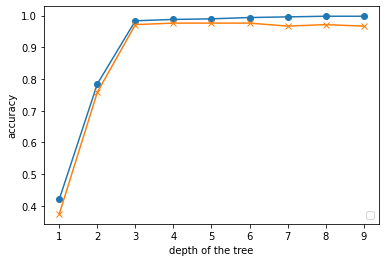

In [46]:

plt.plot(dataframe['max_depth'], dataframe['train_accuracy'], marker = 'o')
plt.plot(dataframe['max_depth'], dataframe['Valid_accuracy'], marker = 'x')

plt.xlabel('depth of the tree')
plt.ylabel('accuracy')
plt.legend(['train_accuracy'], ['Valid_accuracy'], loc = "lower right")
plt.show()

In [48]:
# tuning the existing model

model = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes= 25, random_state = 10)

In [49]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [50]:
model.score(X_train,y_train)

0.9979674796747967

In [51]:
model.score(X_valid,y_valid)

0.976303317535545

In [53]:
model.predict(X_valid)

array([0, 3, 2, 3, 3, 4, 3, 4, 2, 1, 2, 1, 2, 2, 3, 2, 3, 0, 2, 0, 1, 1,
       0, 4, 4, 2, 3, 3, 2, 4, 2, 4, 1, 1, 0, 4, 1, 4, 2, 1, 4, 0, 2, 4,
       2, 3, 2, 4, 1, 0, 0, 0, 0, 4, 1, 0, 2, 1, 1, 1, 2, 3, 4, 2, 4, 3,
       0, 3, 4, 4, 1, 4, 4, 4, 4, 2, 1, 3, 3, 4, 3, 0, 3, 1, 2, 3, 0, 4,
       0, 1, 1, 2, 2, 1, 4, 2, 4, 4, 4, 4, 4, 3, 3, 3, 2, 3, 2, 4, 3, 4,
       3, 3, 2, 0, 1, 3, 2, 0, 2, 2, 2, 1, 2, 3, 1, 3, 1, 0, 4, 1, 1, 1,
       4, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 2, 2, 3, 2, 0, 2, 1, 0, 2, 4, 3,
       3, 3, 1, 2, 2, 1, 0, 2, 1, 1, 0, 0, 3, 4, 4, 3, 1, 0, 0, 2, 0, 4,
       0, 1, 3, 1, 3, 2, 2, 0, 1, 3, 0, 1, 3, 4, 4, 3, 3, 2, 1, 0, 1, 3,
       2, 1, 0, 1, 2, 4, 0, 0, 0, 4, 4, 0, 1])

In [55]:
pip install tree

     |████████████████████████████████| 66 kB 2.7 MB/s 
  Created wheel for tree: filename=Tree-0.2.4-py3-none-any.whl size=7874 sha256=acb93a33587e5d82951d0fbefef5896f8d424c697e48679376cf264211fe97e9
  Stored in directory: /root/.cache/pip/wheels/64/46/53/3a413f321c09b0df8d4a26edd5fc3501c6c1b238497d166638
Successfully built tree


In [61]:
from sklearn import tree

In [68]:
decision_tree = tree.export_graphviz(model, out_file = 'tree.dot', feature_names= X_train.columns, max_depth = 8, filled = True)

In [69]:
!dot -Tpng tree.dot -o tree.png

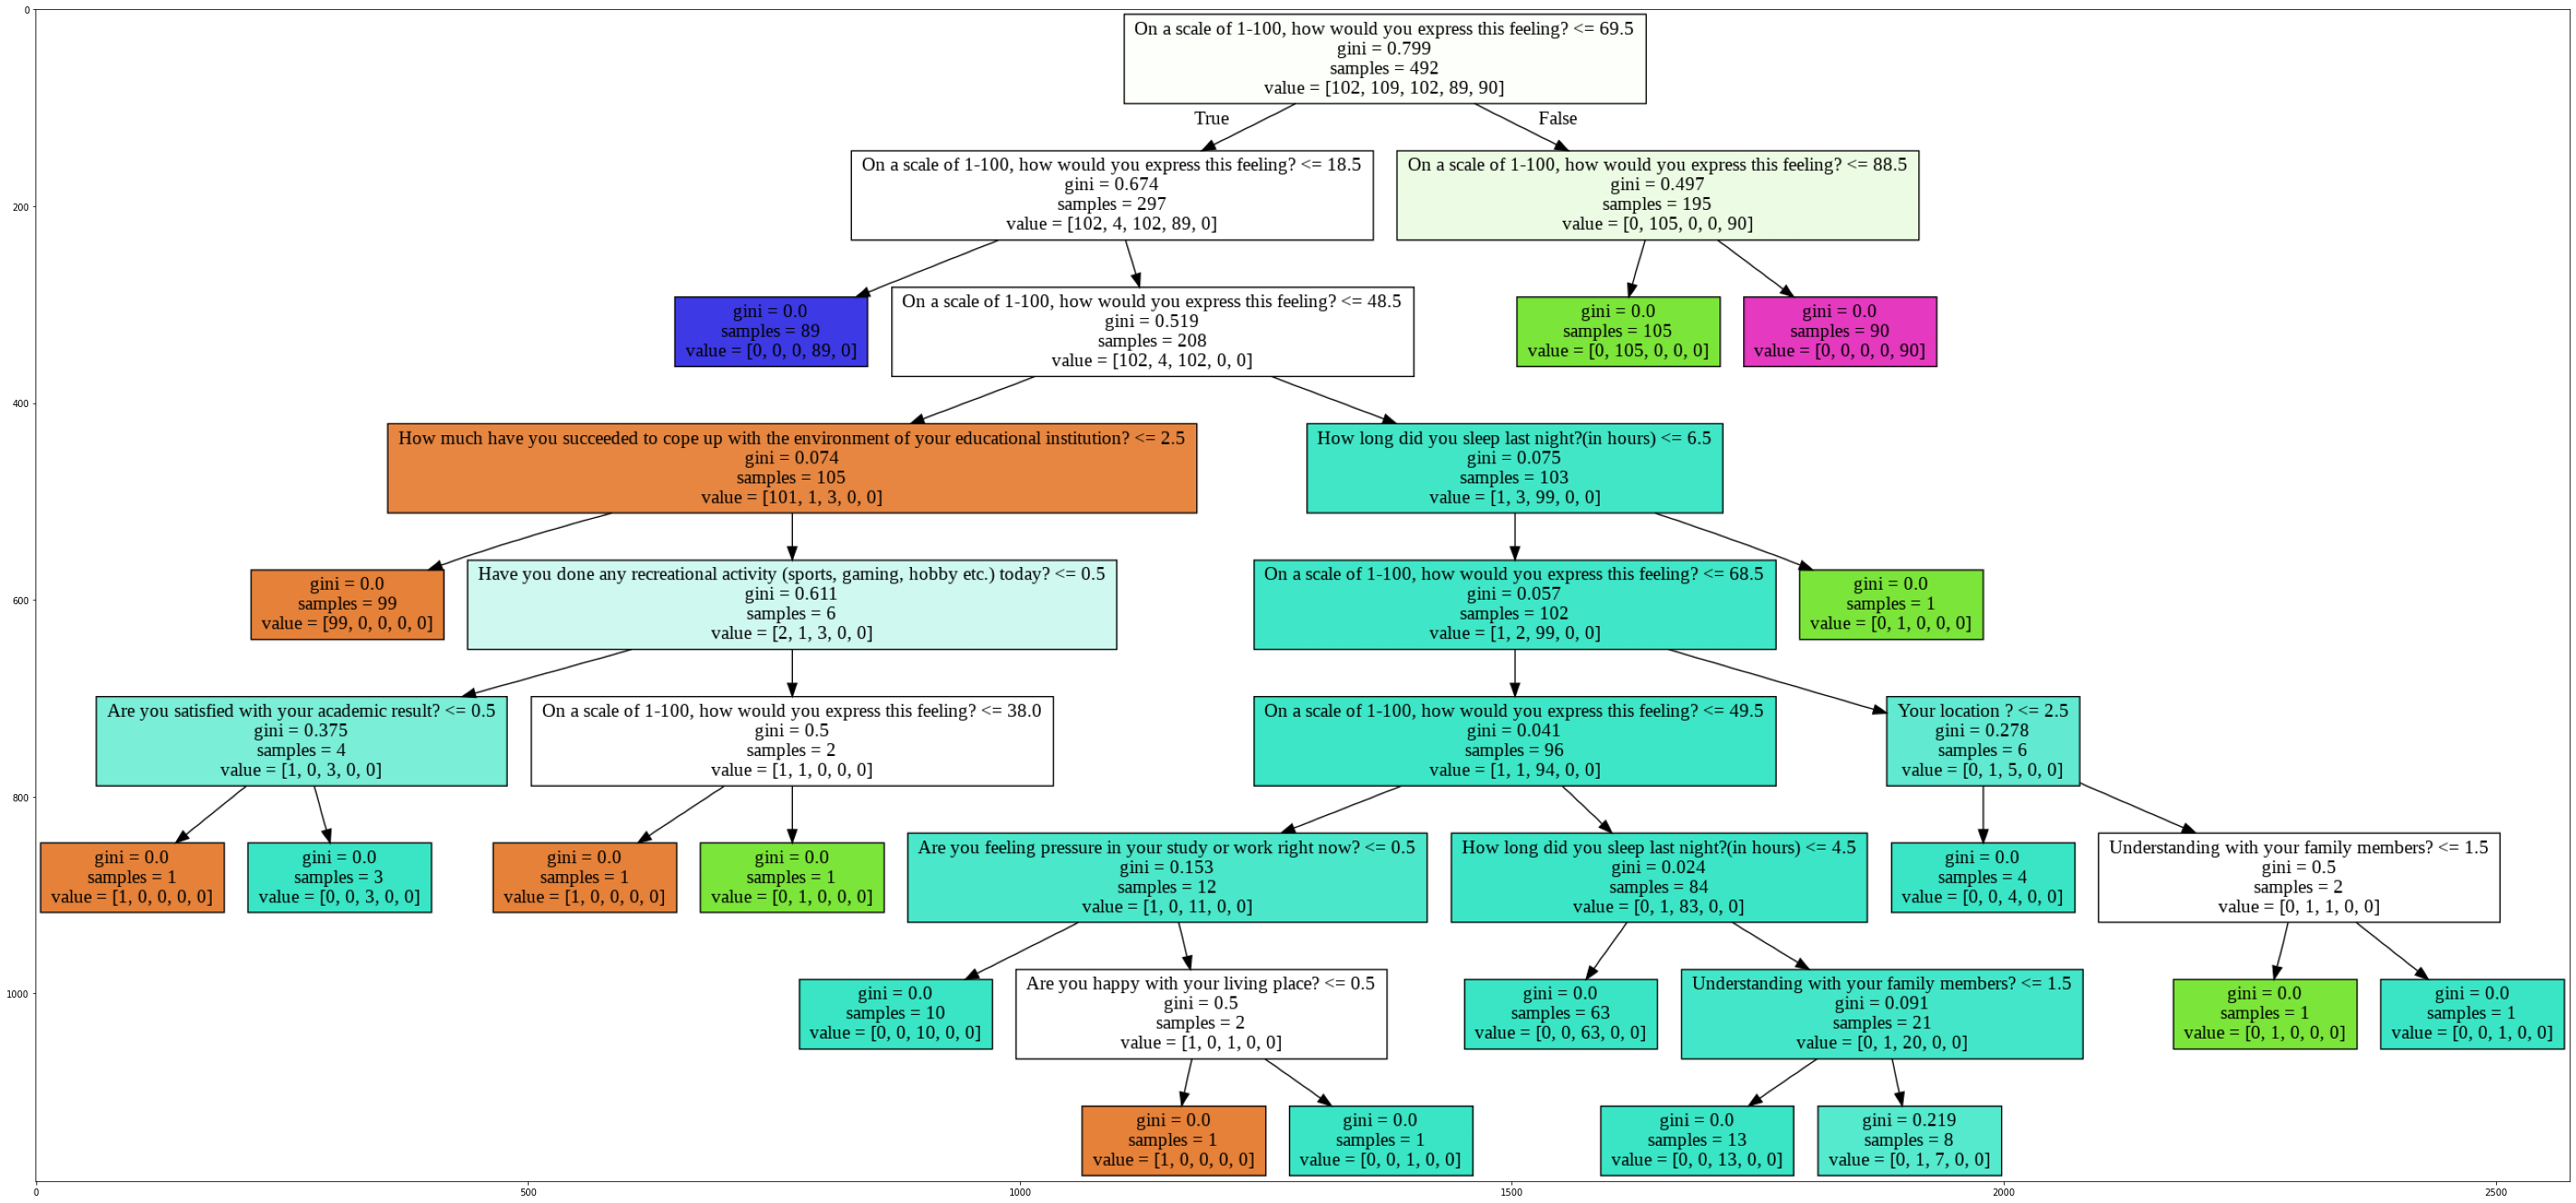

In [70]:
image = plt.imread('tree.png')
plt.figure(figsize = (50,25))
plt.imshow(image)